# Main Steps

1. Frame the problem Look at he bigure picture
2. Get the data
3. Discover and Visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Lanuch, monitor, and maintain your system

# 1. Frame the problem

Here we are predicting whether a patient has a risk of developing heart diesease.

# understanding the data

The information provided by the dataset are:
Demographics:
1. Sex: male or female(Nominal)
2. Age: the age of the patient at the time of the study (Coninuous)
3. Education level

Behavioral:
1. Current Smoker: whether or not the patient is a current smoker (Nominal)(0 - No, 1 - Yes)
2. Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Continuous)

Medical History:
1. BP Meds: whether or not the patient was on blood pressure medication (binary - 0 - No, 1 - Yes)
2. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
3. Prevalent Hyp: whether or not the patient was hypertensive (binary - 0 - No, 1 - Yes)
4. Diabetes: whether or not the patient had diabetes (Nominal) (binary - 0 - No, 1 - Yes)

# Target variable:
10 year risk of CHD

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls


Boston.ipynb
ML0101EN-Reg-Simple-Linear-Regression-Co2-py-v1 (1).ipynb
car price (1).ipynb
framingham.csv
heart_disease predictio.ipynb


# Get the data
we have a dataset in our database so we use a function to load that data.

In [3]:
def load_data(path):
    return pd.read_csv(path)

In [4]:
data=load_data('framingham.csv')

In [5]:
data.shape

(4240, 16)

This dataset has 4240 rows and 16 features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# 3.Discover and Visualize the data to gain insights

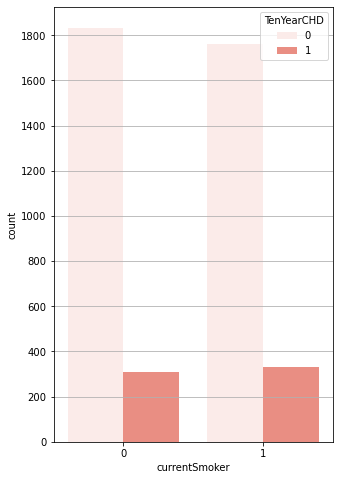

In [9]:
fig,ax=plt.subplots(figsize=(5,8))
plt.grid()
plt.yticks(range(0,2000,200))
#sns.stripplot(data['TenYearCHD'], orient='vertical', ax=ax, color='red')
sns.countplot(x=data['currentSmoker'],hue=data['TenYearCHD'], ax=ax, color='salmon')
plt.show()

non-smoker has low chances to have heart diesease.

In [10]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
data['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

2145 are those who are not smoker but 2095 are those who are still smoker

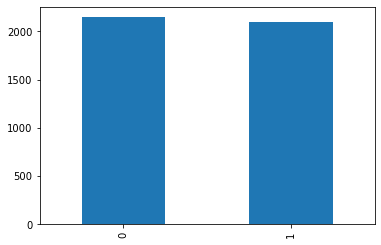

In [12]:
data['currentSmoker'].value_counts().plot(kind='bar')
plt.show()

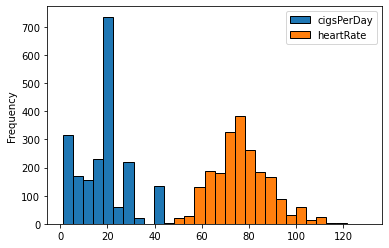

In [74]:
data[data['currentSmoker'] == 1] [['cigsPerDay','heartRate']].plot(kind='hist',bins=30,ec='k')
plt.show()

mostly people have 20 cigs per day and have heartrate between 60-90.

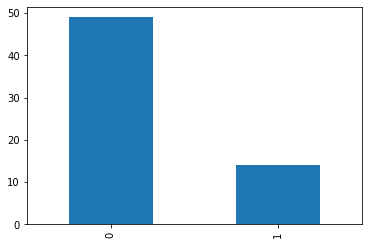

In [14]:
data[(data['male']==1) & (data['heartRate']>=100)]['TenYearCHD'].value_counts().plot(kind='bar')
plt.show()

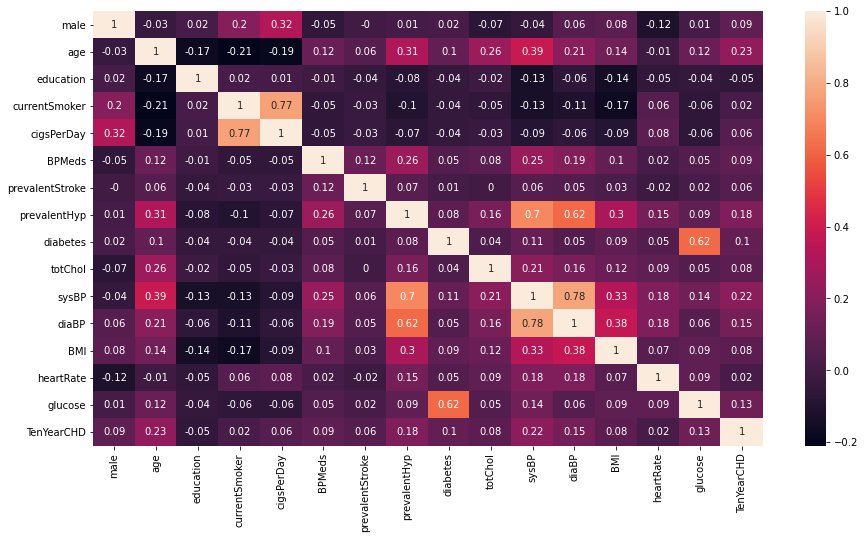

In [15]:
#correlation between features
fig,ax=plt.subplots(figsize=(15,8))
corr_matrix=data.corr()
sns.heatmap(corr_matrix.round(2),annot=True,ax=ax)
plt.show()

Here we can see that age, sysBP and prevalentStroke has strong positive correlation with TenYearCHD while education has strong negative correlation so we can drop this features

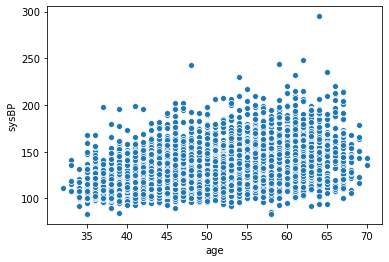

In [16]:
sns.scatterplot(x='age',y='sysBP',data=data)
#plt.bar(data['age'],data['sysBP'])
plt.show()

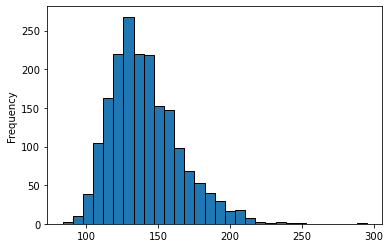

In [17]:
data[data['age']>50]['sysBP'].plot(kind='hist', bins=30,ec='k')
plt.show()

In [18]:
data['sysBP'][data['age']>=50].describe()

count    2023.000000
mean      140.153485
std        24.029286
min        83.500000
25%       123.000000
50%       136.000000
75%       154.000000
max       295.000000
Name: sysBP, dtype: float64

In [19]:
data['sysBP'][data['age']<50].describe()

count    2217.000000
mean      125.238160
std        17.193083
min        83.500000
25%       113.000000
50%       123.000000
75%       134.000000
max       243.000000
Name: sysBP, dtype: float64

In [20]:
data['prevalentHyp'][data['diaBP']].describe()

count    3555.000000
mean        0.385654
std         0.486818
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64

In [21]:
data['sysBP'][data['diaBP']].describe()

count    3555.000000
mean      141.062447
std        25.405156
min       100.000000
25%       121.000000
50%       138.000000
75%       155.000000
max       200.000000
Name: sysBP, dtype: float64

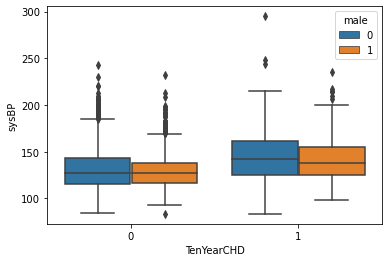

In [22]:
sns.boxplot(y=data['sysBP'], x=data['TenYearCHD'], hue=data['male'])
plt.show()

In [23]:
cat_data=data.copy()

In [24]:
cat_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [25]:
cat_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
cat_data['male']=cat_data['male'].map({0:'Female', 1:'Male'})
cat_data['TenYearCHD']=cat_data['TenYearCHD'].map({0:'negative', 1:'Positive'})
cat_data['diabetes']=cat_data['diabetes'].map({0:'Negative', 1:'positive'})
cat_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,0,0.0,0.0,0,0,Negative,195.0,106.0,70.0,26.97,80.0,77.0,negative
1,Female,46,2.0,0,0.0,0.0,0,0,Negative,250.0,121.0,81.0,28.73,95.0,76.0,negative
2,Male,48,1.0,1,20.0,0.0,0,0,Negative,245.0,127.5,80.0,25.34,75.0,70.0,negative
3,Female,61,3.0,1,30.0,0.0,0,1,Negative,225.0,150.0,95.0,28.58,65.0,103.0,Positive
4,Female,46,3.0,1,23.0,0.0,0,0,Negative,285.0,130.0,84.0,23.10,85.0,85.0,negative


In [27]:
gender=cat_data.groupby('male')

In [28]:
cat_data.loc[gender.groups['Female']]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,Female,46,2.0,0,0.0,0.0,0,0,Negative,250.0,121.0,81.0,28.73,95.0,76.0,negative
3,Female,61,3.0,1,30.0,0.0,0,1,Negative,225.0,150.0,95.0,28.58,65.0,103.0,Positive
4,Female,46,3.0,1,23.0,0.0,0,0,Negative,285.0,130.0,84.0,23.10,85.0,85.0,negative
5,Female,43,2.0,0,0.0,0.0,0,1,Negative,228.0,180.0,110.0,30.30,77.0,99.0,negative
6,Female,63,1.0,0,0.0,0.0,0,0,Negative,205.0,138.0,71.0,33.11,60.0,85.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,Female,56,1.0,1,3.0,0.0,0,1,Negative,268.0,170.0,102.0,22.89,57.0,NaN,negative
4235,Female,48,2.0,1,20.0,NaN,0,0,Negative,248.0,131.0,72.0,22.00,84.0,86.0,negative
4236,Female,44,1.0,1,15.0,0.0,0,0,Negative,210.0,126.5,87.0,19.16,86.0,NaN,negative
4237,Female,52,2.0,0,0.0,0.0,0,0,Negative,269.0,133.5,83.0,21.47,80.0,107.0,negative


In [29]:
cat_data.groupby('male').count()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
Female,2420,2368,2420,2405,2382,2420,2420,2420,2377,2420,2420,2406,2420,2147,2420
Male,1820,1767,1820,1806,1805,1820,1820,1820,1813,1820,1820,1815,1819,1705,1820


In [30]:
cat_data.groupby(['male','currentSmoker']).agg({
    'cigsPerDay':['mean','median','std'],
    'prevalentStroke':['mean','median','std'],
    'sysBP' : ['mean','median','std'],
    'BMI': ['mean','median','std'],
    'heartRate':['mean','median','std'],
    
})

cigsPerDay                   prevalentStroke         \
                           mean median        std            mean median   
male   currentSmoker                                                       
Female 0               0.000000    0.0   0.000000        0.008386      0   
       1              14.147844   15.0   8.978833        0.003033      0   
Male   0               0.000000    0.0   0.000000        0.008403      0   
       1              22.109890   20.0  11.030780        0.003617      0   

                                     sysBP                          BMI  \
                           std        mean median        std       mean   
male   currentSmoker                                                      
Female 0              0.091221  136.310273  132.0  24.429916  26.253563   
       1              0.055020  128.308392  123.0  21.998618  24.440913   
Male   0              0.091348  132.948179  130.0  20.021923  26.925849   
       1              0.060057  130.471519  127.5  18.971850  25.706216   

                                       heartRate                    
                     median       std       mean median        std  
male   currentSmoker                                                
Female 0              25.62  4.547583  76.576520   75.0  12.147732  
       1              23.68  4.195815  77.852376   75.0  11.976632  
Male   0              26.70  3.344390  72.243697   72.0  11.789029  
       1              25.61  3.378267  75.558371   75.0  11.536116

In [31]:
dialesis=cat_data.groupby(['diabetes','TenYearCHD']).sum()
dialesis

age  education  currentSmoker  cigsPerDay  BPMeds  \
diabetes TenYearCHD                                                         
Negative Positive     32631     1100.0            319      6545.0    35.0   
         negative    171602     6901.0           1737     30693.0    80.0   
positive Positive      2239       61.0             14       279.0     6.0   
         negative      3748      123.0             25       407.0     3.0   

                     prevalentStroke  prevalentHyp   totChol     sysBP  \
diabetes TenYearCHD                                                      
Negative Positive                 10           299  145753.0   86350.5   
         negative                 14           960  819260.0  458761.5   
positive Positive                  1            26   10069.0    6140.0   
         negative                  0            32   16689.0    9931.5   

                        diaBP       BMI  heartRate   glucose  
diabetes TenYearCHD                                           
Negative Positive     52504.0  15751.14    45997.0   44888.0  
         negative    289545.0  90157.70   266988.0  252951.0  
positive Positive      3512.0   1069.80     3212.0    7983.0  
         negative      5925.5   1926.54     5454.0    9902.0

In [32]:
(data.corrwith(data['TenYearCHD'])*100).sort_values(ascending=False)

TenYearCHD         100.000000
age                 22.540774
sysBP               21.637383
prevalentHyp        17.745756
diaBP               14.511159
glucose             12.559036
diabetes             9.734424
male                 8.837357
BPMeds               8.751945
totChol              8.236854
BMI                  7.530032
prevalentStroke      6.182263
cigsPerDay           5.775521
heartRate            2.290661
currentSmoker        1.944850
education           -5.424847
dtype: float64

In [33]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# prepare the data for ML

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
heart_data=data.copy()

In [36]:
heart_data=heart_data.drop('education', axis=1)

In [37]:
X=heart_data.iloc[:,:14]

In [38]:
X.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [39]:
y=heart_data.iloc[:,-1]

In [40]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [42]:
full_pipeline=Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan,strategy='median')),
    ('std_scaler', StandardScaler()),
    
])

In [43]:
x_train=full_pipeline.fit_transform(X_train)
x_train=pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.860453,0.399744,0.987694,0.912035,-0.177849,-0.075053,-0.676051,-0.1679,-0.371293,-0.065841,0.499815,-0.421826,1.163362,0.579955
1,-0.860453,1.686207,0.987694,-0.261729,-0.177849,-0.075053,1.479179,-0.1679,0.042274,0.473015,0.083742,-1.401143,-1.765022,-0.382561
2,-0.860453,-1.354523,-1.012460,-0.764771,-0.177849,-0.075053,-0.676051,-0.1679,-1.198426,-1.457886,-0.914834,-0.893259,0.745021,0.054946
3,-0.860453,-0.068061,-1.012460,-0.764771,-0.177849,-0.075053,-0.676051,-0.1679,0.754528,-0.267912,-1.289300,0.178401,-0.510001,-0.207558
4,1.162178,0.750597,0.987694,0.912035,-0.177849,-0.075053,-0.676051,-0.1679,-1.175450,-0.739411,-1.330907,-0.293032,-0.510001,0.054946


In [44]:
lg_reg=LogisticRegression()
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
x_test=full_pipeline.transform(X_test)

In [46]:
y_pred=lg_reg.predict(x_test)

In [47]:
y_hat=lg_reg.predict(x_train)

In [48]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [49]:
y_hat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [51]:
print(confusion_matrix(y_train, y_hat))

[[2853   18]
 [ 470   51]]


In [52]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2871
           1       0.74      0.10      0.17       521

    accuracy                           0.86      3392
   macro avg       0.80      0.55      0.55      3392
weighted avg       0.84      0.86      0.81      3392



In [53]:
print("accuracy score: ",accuracy_score(y_train, y_hat)*100)

accuracy score:  85.61320754716981


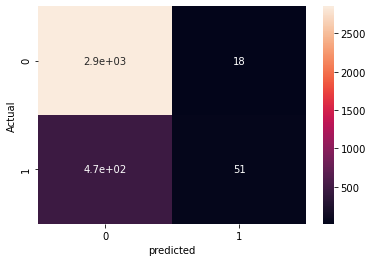

In [54]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, y_hat)), annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
score=lg_reg.predict_proba(x_test)

In [56]:
score=pd.DataFrame(data=score, columns=['No Heart Disease', 'Heart Disease'])

In [57]:
score

,No Heart Disease,Heart Disease
0,0.915065,0.084935
1,0.878888,0.121112
2,0.878314,0.121686
3,0.569700,0.430300
4,0.818683,0.181317
...,...,...
843,0.948043,0.051957
844,0.871659,0.128341
845,0.586397,0.413603
846,0.946505,0.053495


In [58]:
from sklearn.metrics import roc_curve


In [59]:
y_prob=lg_reg.predict_proba(x_test)

In [60]:
y_prob.shape

(848, 2)

In [62]:
fpr, tpr, thres=roc_curve(y_test, y_prob[:,-1])

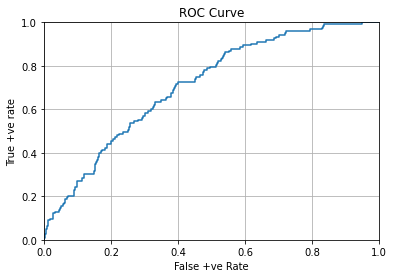

In [66]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve rate')
plt.grid()

In [71]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_prob[:,1])*100)

70.96607793664144
